<a href="https://colab.research.google.com/github/dakshpat/Final-Project-Phys-240-/blob/main/Ising_Model_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2D Ising Model

Below is code to run Monte Carlo simulations of the Ising Model in 2D.  To remind you, this system has an energy that is determined by the pairwise interactions of all of the spins which neighbor one another.  We can compute the energy of a specific configuration by:

$E = \sum_{neighbors} -J \sigma_i \sigma_j$

where $J$ is a coupling constant, and the sum is performed over pairs of neighbors in the system.  In 2D, this means taking into account not only the pairs that are next to one another, but also below and above each other.  

These calculations are scientifically more expensive than the previous calculations you've done, so it may take some time to run.  There are several parameters that you can tune which may help you out.  These include:

* size: the system's size
* T: The temperature.  Note that temperature is scaled relative to J above, so we've implicitly set J = 1.0
* numtrials: The number of Monte Carlo trials to make
* animateskip: The code will make a move at the end.  You (typically) don't want ever frame to come up in your movie, so this will dictate how many trials to skip between frames.  This can have a significant impact on the speed of making the movie.
* dataskip: Like above, you may not want to save your data every step if you take a lot of steps.  This will dictate how many trials to skip between times when the data is saved.

Note that we can save a large amount of time by not actually calculating the energy at each trial, but instead just the CHANGE in energy when we perform a flip.  To do this, we pick a random spin we are going to try to flip.  The change in energy associated with that flip is completely dictated by its four neighbors.  You  can calculate $\Delta E$, the change in energy of flipping spin $(i,j)$ as:

$\Delta E = 2 * \sigma_{i,j} \sum_{neighbors}{\sigma_k}$

Where $\sigma_k$ is each of the four neighbors to spin $(i,j)$ (one above, one below, one to the left, and one to the right). This is done in the ```deltaE``` routine below.

Import the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import time
import math
from IPython.display import HTML

Here are the main variables you can change.  Size affects how large your system is, T is a dimensionless temperature, and skip affects how often the results are plotted.  You can modify the length of your simulation by changing numtrials.  Note that larger simulations will require more trials to reach the same level of convergence.

In [40]:
size = 25 #lattice length
Ti =5.0 # in units of J/k
numtrials = 500000 #number of MC moves to make
animateskip=500 #frequency for animating movie
dataskip=5 #frequency for saving data

This function sets up your initial spin array with random values of 0 or 1 in each spot

In [18]:
def initialize():
    spinarray = np.random.random([size,size]) # initializes with random numbers from 0 to 1.
    spinarray[spinarray<0.5] = -1 #If an array element has a value of less than 0.5, set it to -1
    spinarray[spinarray>0.5] = 1 #If an array element has a value of greater than 0.5, set it to 1
    return spinarray

Function for computing the change in energy if spin i,j is flipped.  Note that we are using "periodic boundary conditions," which means that if we are looking at a spin on the edge of the box then we say its neighbor is on the other size (that is, the box wraps around so that there are no edges).

In [19]:
def deltaE(i,j):
    leftS = s[i-1,j] 
    if i==size-1:
      rightS = s[0,j] 
    else:
       rightS= s[i+1,j]
    bottomS = s[i,j-1]
    if j==size-1:
      topS = s[i,0]
    else:
      topS = s[i,j+1]
    return 2.0 * s[i,j] * (leftS + rightS + topS + bottomS)

This is a routine for plotting your spins as the simulation proceeds. Note you can change the colormap to any of the user defined types: http://matplotlib.org/examples/color/colormaps_reference.html

In [20]:
def colorsquare(frame):
    pt1.set_array(anim_frames[frame,:,:])
    frame_num = frame*animateskip
    txt_title.set_text(('Frame = %8i'%frame_num))
    return pt1,

This is the main portion of our code. 

First we setup a random spin array and arrays for the magnetization  (av_mag) and for savings copies of the spin array that we will later animate (anim_frames).

We then make a plot of the initial spin array for viewing

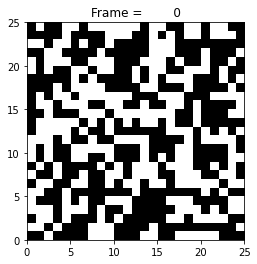

Time to completion:  3.8714804649353027 s


In [21]:
s = initialize()   #Inititialize the spin matrix with random values
av_mag=np.zeros(int(numtrials/dataskip+1))      #Set up the arrays for storing average magnetization and correlation
av_mag[0]=np.abs(np.mean(s))
#The following are all commands needed to make a movie of your simulation

anim_frames=np.zeros((int(numtrials/animateskip),size,size))
num_animation = 0


# Make a plot of our initial system and setup ourfigure and axes for animation later
fig = plt.figure()
ax1 = plt.subplot()
ax1.set_xlim(( 0,size))            
ax1.set_ylim((0,size))
ax1.set_aspect('equal', 'box')
# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Frame = %8i'%0)
pt1 = ax1.pcolorfast(s, cmap=cm.Greys_r,animated=True)
plt.show()


start=time.time() #get the system's time to let us know how long we run for
for trial in range(1,numtrials+1): #main loop
    i = int(np.random.random()*size)# choose random row 
    j = int(np.random.random()*size)# choose random column
    ediff = deltaE(i,j) #perform an energy evaluation for flipping that element
    if ediff <= 0: # flipping reduces the energy
      s[i,j] *= -1
    elif np.random.random() < math.exp(-ediff/T): #flipping increases the energy, so do it with a Metropolis criteria
      s[i,j] *= -1
    if trial%dataskip==0:   #save data at the specified frequency
      av_mag[int(trial/dataskip)]=np.abs(np.mean(s))
    if trial%animateskip==0: #save date to be plotted at a specified frequency
      anim_frames[num_animation,:,:] = s
      num_animation += 1

anim = animation.FuncAnimation(fig, colorsquare, interval=20, blit=True,frames=num_animation)
stop=time.time() #get the system's time 
print("Time to completion: ",stop-start,"s")

Plot the net magnetization and also compute the average of this quantity over the first and last half of the simulation.

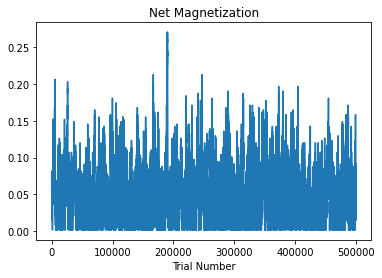

Average magnetization over first half of the simulation = 0.05276595336186553
Average magnetization over last half of the simulation = 0.051406976000000014


In [22]:
plt.plot(np.linspace(0,numtrials,len(av_mag)),av_mag)
plt.title('Net Magnetization')
plt.xlabel('Trial Number')
plt.show()
av_mag_1, av_mag_2 = np.array_split(av_mag,2)
print('Average magnetization over first half of the simulation =',np.mean(av_mag_1))
print('Average magnetization over last half of the simulation =',np.mean(av_mag_2))

Make the movie of the simulation.  Note that this can be quite slow if you saved a lot of frames, so once you are comfortable with what is going on, you can skip this step.

In [8]:
HTML(anim.to_html5_video())

#A. The Transition Temperature

Run the 2D Ising model at a series of temperature ranging from just above 0 (you can't do 0 exactly) to 5.0.  Plot the average magnetization as a function of temperature.  A few notes/suggestions:

1.  For a given temperature, you may want to run the code multiple times, run it for longer, or try a different size grid to make sure you are getting the correct results.  
2.  You can either automate running at multiple temperature (for example, by putting the code in a for loop) or run it at different temperatures by hand. 
3. You should have a relatively smooth graph.  Therefore, if you have an area where the magnetization as a function of temperature is changing a lot you may need to try more temperature values.

You should see a transition where the system goes from highly ordered (high magnetization) to disordered (low magnetization).  At what temperature does this occur?  This is the transition temperature of the system, and corresponds to a phase transition.

In [72]:
temp = np.arange(0.1, 5.1, .1)
avg_magArray = []

for T in temp: 
  s = initialize()   #Inititialize the spin matrix with random values
  av_mag=np.zeros(int(numtrials/dataskip+1))      #Set up the arrays for storing average magnetization and correlation
  av_mag[0]=np.abs(np.mean(s))
  #The following are all commands needed to make a movie of your simulation

  anim_frames=np.zeros((int(numtrials/animateskip),size,size))
  num_animation = 0


  start=time.time() #get the system's time to let us know how long we run for
  for trial in range(1,numtrials+1): #main loop
      i = int(np.random.random()*size)# choose random row 
      j = int(np.random.random()*size)# choose random column
      ediff = deltaE(i,j) #perform an energy evaluation for flipping that element
      if ediff <= 0: # flipping reduces the energy
        s[i,j] *= -1
      elif np.random.random() < math.exp(-ediff/T): #flipping increases the energy, so do it with a Metropolis criteria
        s[i,j] *= -1
      if trial%dataskip==0:   #save data at the specified frequency
        av_mag[int(trial/dataskip)]=np.abs(np.mean(s))
      if trial%animateskip==0: #save date to be plotted at a specified frequency
        anim_frames[num_animation,:,:] = s
        num_animation += 1

  avg_magArray.append(np.mean(av_mag))

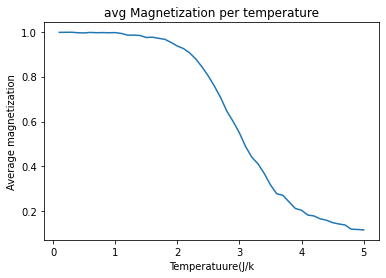

In [73]:
plt.plot(temp,avg_magArray)
plt.title('avg Magnetization per temperature')
plt.xlabel('Temperatuure(J/k')
plt.ylabel('Average magnetization')
plt.show()

#B. External Magnetic Fields

Feromagnets (like we are modelling here) can exist in an external magnetic field.  We can model their effects by altering the energy of the system to be:

$E = \sum_{neighbors} -J \sigma_i \sigma_j - \sum_{spins}\lambda \sigma_i$

Where $\lambda$ is the strength of the external magnetic field and the second sum is performed over each individual spin.

Modify the Ising model code to incorporate this external magnetic field.  Two hints:

1.  Note that in the Monte Carlo algorithm we are concerned with *changes* in energy when we flip a single.  Based on the equation above, determine how the energy of the system changes when a single spin is flipped (either from $\sigma=1$ to $\sigma = -1$ or from $\sigma=-1$ to $\sigma=1$. 

2.  We already have a function for computing energy changes when a spin is flipped.  You should modify that function. 

Set the strength of the external field to be $\lambda=0.2$.  Repeat part A.  How does this external magnetic field changes the transition temperature? Provide an explanation for why this might be the case.

In [68]:
size = 25 #lattice length
Ti =5.0 # in units of J/k
numtrials = 500000 #number of MC moves to make
animateskip=500 #frequency for animating movie
dataskip= 10 #frequency for saving data

In [69]:
lamb = 0.2

def deltaE(i,j):
    leftS = s[i-1,j] 
    if i==size-1:
      rightS = s[0,j] 
    else:
       rightS= s[i+1,j]
    bottomS = s[i,j-1]
    if j==size-1:
      topS = s[i,0]
    else:
      topS = s[i,j+1]

    if (s[i,j] == 1):
      change = -2
    else:
      change = +2

    return 2.0 * s[i,j] * (leftS + rightS + topS + bottomS) - lamb*change 

In [70]:
temp = np.arange(0.1, 5.1, .1)
avg_magArray = []

for T in temp: 
  s = initialize()   #Inititialize the spin matrix with random values
  av_mag=np.zeros(int(numtrials/dataskip+1))      #Set up the arrays for storing average magnetization and correlation
  av_mag[0]=np.abs(np.mean(s))
  #The following are all commands needed to make a movie of your simulation

  anim_frames=np.zeros((int(numtrials/animateskip),size,size))
  num_animation = 0


  start=time.time() #get the system's time to let us know how long we run for
  for trial in range(1,numtrials+1): #main loop
      i = int(np.random.random()*size)# choose random row 
      j = int(np.random.random()*size)# choose random column
      ediff = deltaE(i,j) #perform an energy evaluation for flipping that element
      if ediff <= 0: # flipping reduces the energy
        s[i,j] *= -1
      elif np.random.random() < math.exp(-ediff/T): #flipping increases the energy, so do it with a Metropolis criteria
        s[i,j] *= -1
      if trial%dataskip==0:   #save data at the specified frequency
        av_mag[int(trial/dataskip)]=np.abs(np.mean(s))
      if trial%animateskip==0: #save date to be plotted at a specified frequency
        anim_frames[num_animation,:,:] = s
        num_animation += 1

  avg_magArray.append(np.mean(av_mag))

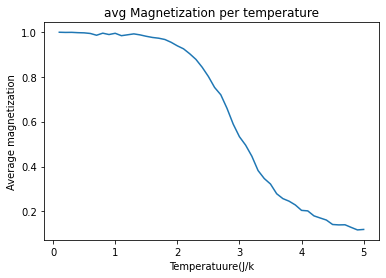

In [71]:
plt.plot(temp,avg_magArray)
plt.title('avg Magnetization per temperature')
plt.xlabel('Temperatuure(J/k')
plt.ylabel('Average magnetization')
plt.show()

The external field soothens the curve in the beginning and also decreases the drop in the magnetization for different temperature. 